## Travelling Salesman

In [1]:
import numpy as np
import pylab as pl
import math
from TSP_scripts import *

from IPython.display import clear_output

In [59]:
n_cities, dims = 16, 2

cities = sample_n_points(n_cities, dims)
indexes = list(range(n_cities))

distance_matrix = compute_distance_matrix(cities)

In [39]:
def brute_force(indexes):
    all_paths = all_permutations(indexes[1:])
    concatenate_to_all_lists(all_paths, indexes[0])
    
    lengths = get_all_paths_lengths(distance_matrix, all_paths)
    return min(lengths)

brute_force(indexes)

2.4000523913036043

In [60]:
from dataclasses import dataclass
from typing import Tuple, Dict, List

@dataclass(frozen=True)
class State:
    k: int          # Current city
    A: Tuple[int]   # Cities to visit

    def get_number_of_actions(self) -> int:
        return len(self.A)

    def step(self, action: int) -> "State":
        return State(action, tuple(a for a in self.A if a != action))
        

state = State(indexes[0], tuple(indexes[1:]))
state

State(k=0, A=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15))

In [61]:
def get_next_states(state: State, depth: int = 1) -> List[State]:
    if depth == 0:
        return [state]

    next_current_cities = all_subsets_of_n_elements(state.A, depth)
    next_states = []
    for next_ks in next_current_cities:
        for next_k in next_ks:
            next_A = tuple(a for a in state.A if a not in next_ks)
            next_state = State(next_k, next_A)

            next_states.append(next_state)

    return next_states


def compute_cost(init_state: State) -> Dict[State, float]:
    value_function = dict()
    max_depth = init_state.get_number_of_actions()

    states = get_next_states(init_state, max_depth)
    for state in states:
        value_function[state] = distance_matrix[state.k, 0]

    for depth in range(max_depth-1, -1, -1):
        states = get_next_states(init_state, depth)
        
        for state in states:
            next_states = get_next_states(state)
            costs = [distance_matrix[state.k, next_state.k] + value_function[next_state] for next_state in next_states]
            value_function[state] = min(costs)

    return value_function


def get_best_action(state:State, value_function: Dict[State, float]) -> int:
    next_states = get_next_states(state)
    costs = [distance_matrix[state.k, next_state.k] + value_function[next_state] for next_state in next_states]
    return next_states[np.argmin(costs)].k

def get_best_path(state:State, value_function: Dict[State, float]) -> List[int]:
    best_path = []
    for i in range(state.get_number_of_actions()):
        best_action = get_best_action(state, value_function)
        best_path.append(best_action)
        state = state.step(best_action)

    return best_path
        

value_function = compute_cost(state)

best_path = get_best_path(state, value_function)
best_path.extend([indexes[0], best_path[0]])

value_function[state], best_path

(3.6996701206308944,
 [10, 6, 1, 9, 8, 7, 5, 14, 2, 4, 11, 3, 12, 13, 15, 0, 10])

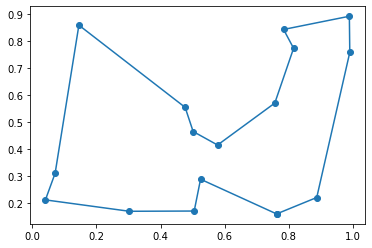

In [62]:
def path_to_points(path, cities):
    return np.array([cities[i] for i in path])
    
pl.plot(path_to_points(best_path, cities)[:,0], path_to_points(best_path, cities)[:,1], '-o')